In [2]:
! git clone https://github.com/rixprakash/ds3001group

Cloning into 'ds3001group'...
remote: Enumerating objects: 409, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 409 (delta 54), reused 31 (delta 31), pack-reused 344 (from 1)
Receiving objects: 100% (409/409), 32.11 MiB | 9.03 MiB/s, done.
Resolving deltas: 100% (199/199), done.


In [3]:
# Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read in files

poverty = pd.read_csv("/content/ds3001group/arizona/azpoverty.csv")
outcomes = pd.read_excel("/content/ds3001group/arizona/arizonaoutcomes.xlsx")
outcomes2012 = outcomes[outcomes['year'] == 2012]
outcomes2016 = outcomes[outcomes['year'] == 2016]
outcomes2020 = outcomes[outcomes['year'] == 2020]

In [5]:
azdemographics2012 = pd.read_excel("/content/ds3001group/dataverse_files/demographicsallstates2012.xlsx")
azdemographics2016 = pd.read_excel("/content/ds3001group/dataverse_files/demographicsallstates2016.xlsx")
azdemographics2020 = pd.read_excel("/content/ds3001group/dataverse_files/demographicsallstates2020.xlsx")
azdemographics2012 = azdemographics2012[azdemographics2012['State Name'] == "Arizona"]
azdemographics2016 = azdemographics2016[azdemographics2016['State Name'] == "Arizona"]
azdemographics2020 = azdemographics2020[azdemographics2020['State Name'] == "Arizona"]
azdemographics2012['County Name'] = azdemographics2012['County Name'].str.upper()
azdemographics2012['County Name'] = azdemographics2012['County Name'].str.replace(' COUNTY', '')
azdemographics2016['County Name'] = azdemographics2016['County Name'].str.upper()
azdemographics2016['County Name'] = azdemographics2016['County Name'].str.replace(' COUNTY', '')
azdemographics2020['County Name'] = azdemographics2020['County Name'].str.upper()
azdemographics2020['County Name'] = azdemographics2020['County Name'].str.replace(' COUNTY', '')

<ipython-input-5-82bc07d6c7f3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  azdemographics2012['County Name'] = azdemographics2012['County Name'].str.upper()
<ipython-input-5-82bc07d6c7f3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  azdemographics2012['County Name'] = azdemographics2012['County Name'].str.replace(' COUNTY', '')
<ipython-input-5-82bc07d6c7f3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [6]:
# Wrangling

poverty['Percent in Poverty'].unique()
poverty['Percent in Poverty'].value_counts()
poverty['Percent in Poverty'].isnull().sum() # No missing values


0

In [7]:
# Matching column names of files to merge
poverty['Name'] = poverty['Name'].str.replace(' County', '')
poverty['Name'] = poverty['Name'].str.upper()

In [8]:
# Merge outcomes2020 with poverty
# Problem: poverty has years beyond just 2020, need to merge only with 2020 rows

poverty2020 = poverty[poverty['Year'] == 2020]
merged_df2020 = pd.merge(poverty2020, outcomes2020, left_on='Name', right_on='county_name', how='outer')
merged_df2020 = merged_df2020.iloc[2:].reset_index(drop=True)

poverty2016 = poverty[poverty['Year'] == 2016]
merged_df2016 = pd.merge(poverty2016, outcomes2016, left_on='Name', right_on='county_name', how='outer')
merged_df2016 = merged_df2016.iloc[2:].reset_index(drop=True)

poverty2012 = poverty[poverty['Year'] == 2012]
merged_df2012 = pd.merge(poverty2012, outcomes2012, left_on='Name', right_on='county_name', how='outer')
merged_df2012 = merged_df2012.iloc[2:].reset_index(drop=True)

Mean:  18.88823529411765
Median:  17.8
Mode:  0    12.0
1    15.2
2    21.1
3    24.8
4    33.2
Name: Percent in Poverty, dtype: float64
51


<Axes: title={'center': 'Percent in Poverty'}, xlabel='party'>

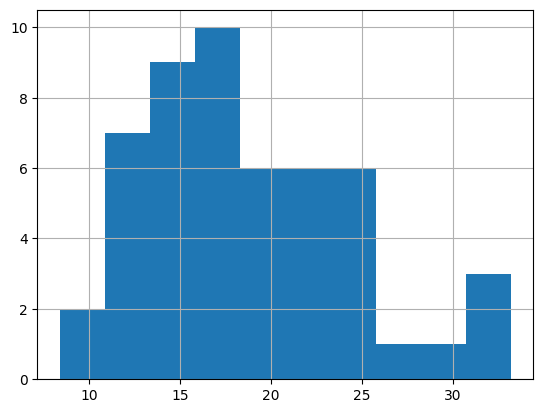

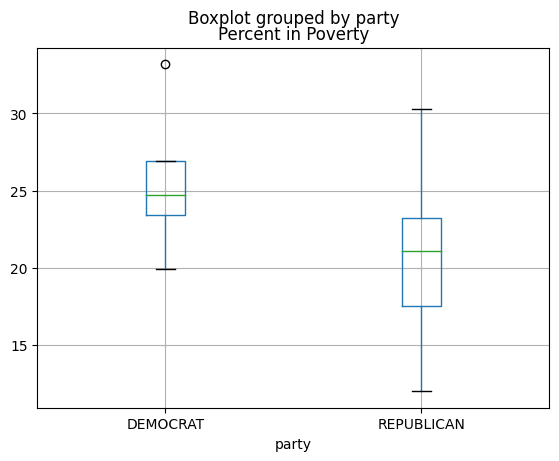

In [9]:
# EDA
poverty['Percent in Poverty'].hist() # Histogram distribution
print('Mean: ', poverty['Percent in Poverty'].mean() ) # Measures of central tendency
print('Median: ', poverty['Percent in Poverty'].median() )
print('Mode: ', poverty['Percent in Poverty'].mode() )
print(poverty.shape[0]) # 55 rows

merged_df2012.boxplot(column = 'Percent in Poverty',by = 'party')

In [15]:
az2012data = pd.merge(azdemographics2012, outcomes2012, left_on='County Name', right_on='county_name', how='outer')
outcomes2012.head(20)



,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,2012,ARIZONA,AZ,APACHE,4001,US PRESIDENT,BARACK OBAMA,DEMOCRAT,17147,25848,20220315,TOTAL
1,2012,ARIZONA,AZ,COCHISE,4003,US PRESIDENT,MITT ROMNEY,REPUBLICAN,29497,49003,20220315,TOTAL
2,2012,ARIZONA,AZ,COCONINO,4005,US PRESIDENT,BARACK OBAMA,DEMOCRAT,29257,51731,20220315,TOTAL
3,2012,ARIZONA,AZ,GILA,4007,US PRESIDENT,MITT ROMNEY,REPUBLICAN,13455,21528,20220315,TOTAL
4,2012,ARIZONA,AZ,GRAHAM,4009,US PRESIDENT,MITT ROMNEY,REPUBLICAN,8076,11855,20220315,TOTAL
5,2012,ARIZONA,AZ,GREENLEE,4011,US PRESIDENT,MITT ROMNEY,REPUBLICAN,1592,2974,20220315,TOTAL
6,2012,ARIZONA,AZ,LA PAZ,4012,US PRESIDENT,MITT ROMNEY,REPUBLICAN,3714,5717,20220315,TOTAL
7,2012,ARIZONA,AZ,MARICOPA,4013,US PRESIDENT,MITT ROMNEY,REPUBLICAN,749885,1376558,20220315,TOTAL
8,2012,ARIZONA,AZ,MOHAVE,4015,US PRESIDENT,MITT ROMNEY,REPUBLICAN,49168,70010,20220315,TOTAL
9,2012,ARIZONA,AZ,NAVAJO,4017,US PRESIDENT,MITT ROMNEY,REPUBLICAN,19884,37335,20220315,TOTAL


In [16]:
outcomes_subset2012 = outcomes2012[['county_name', 'office', 'candidate', 'party', 'candidatevotes', 'totalvotes']]
azalldata2012 = pd.merge(azdemographics2012, outcomes_subset2012, left_on='County Name', right_on='county_name', how='left')
azalldata2012 = azalldata2012.drop('county_name', axis=1)

outcomes_subset2016 = outcomes2016[['county_name', 'office', 'candidate', 'party', 'candidatevotes', 'totalvotes']]
azalldata2016 = pd.merge(azdemographics2016, outcomes_subset2016, left_on='County Name', right_on='county_name', how='left')
azalldata2016 = azalldata2016.drop('county_name', axis=1)

outcomes_subset2020 = outcomes2020[['county_name', 'office', 'candidate', 'party', 'candidatevotes', 'totalvotes']]
azalldata2020 = pd.merge(azdemographics2020, outcomes_subset2020, left_on='County Name', right_on='county_name', how='left')
azalldata2020 = azalldata2020.drop('county_name', axis=1)

<Axes: title={'center': 'more than $200,000 Percentage'}, xlabel='party'>

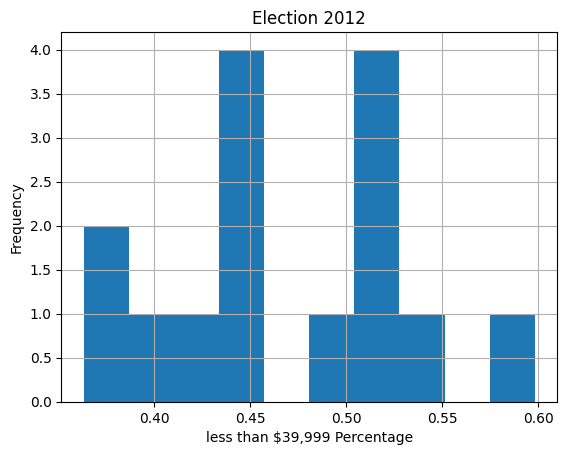

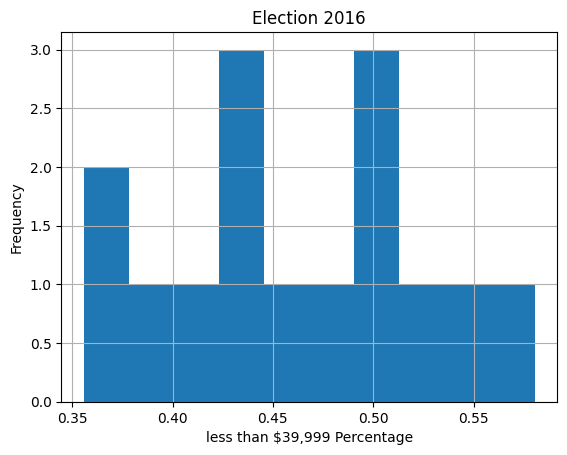

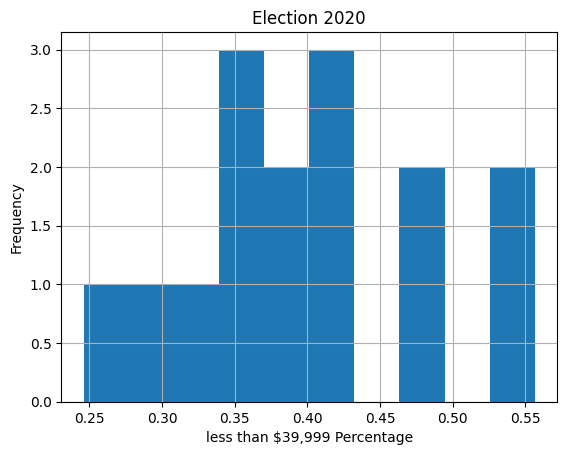

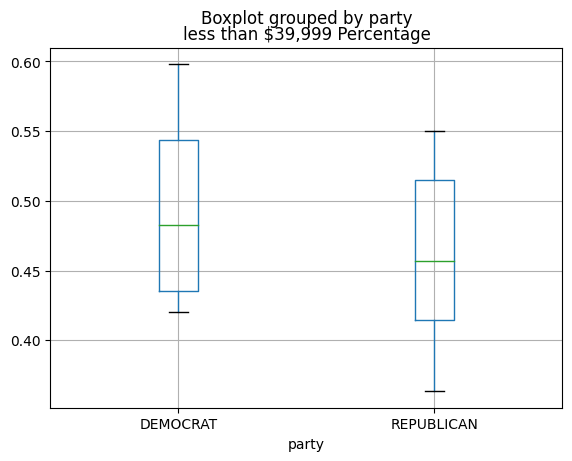

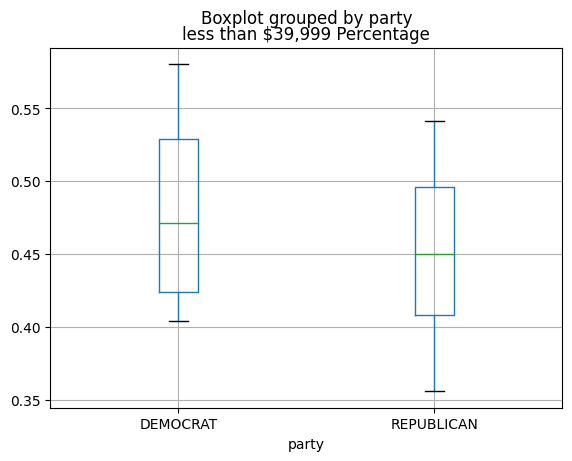

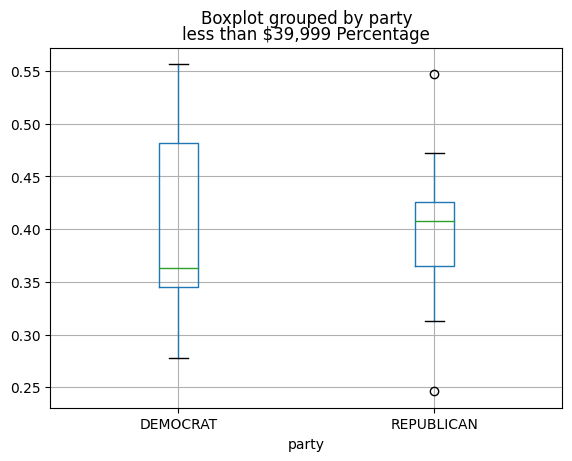

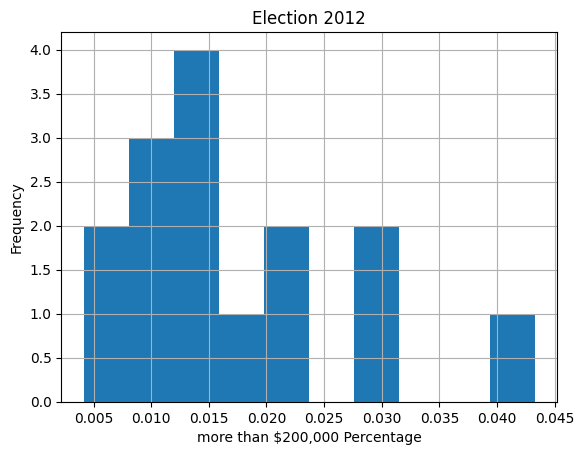

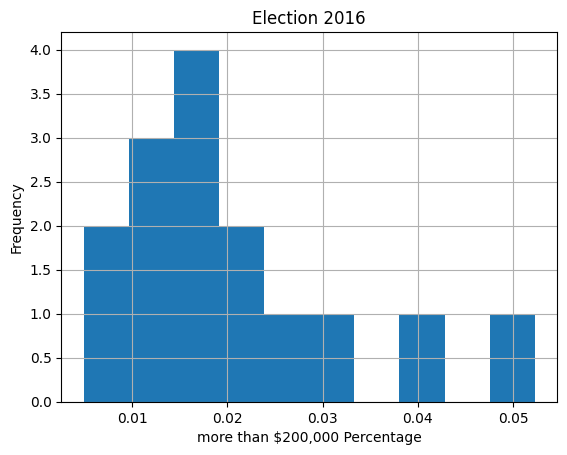

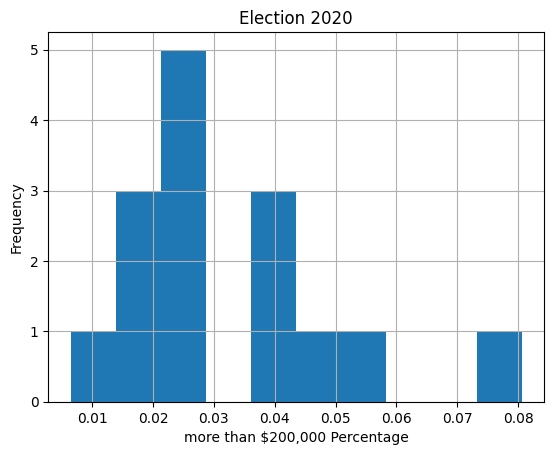

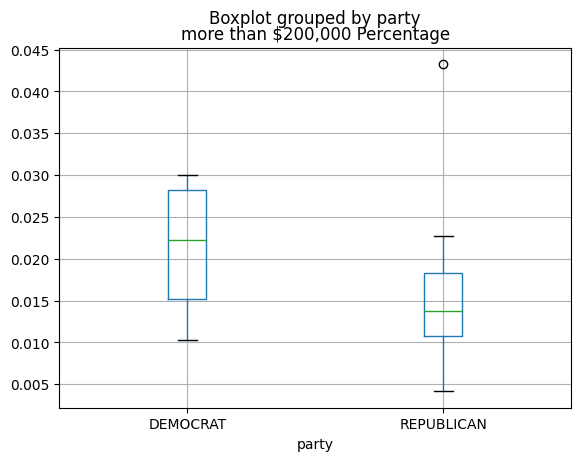

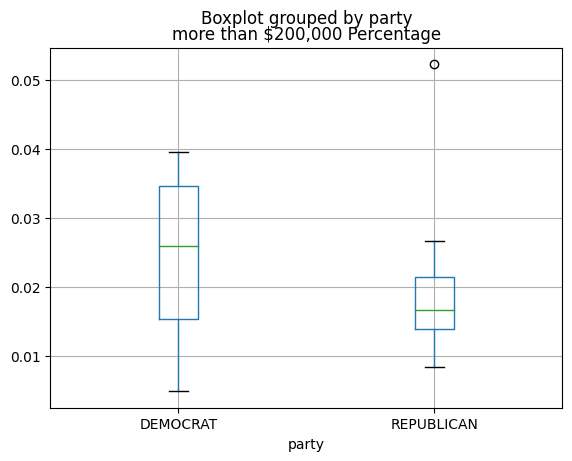

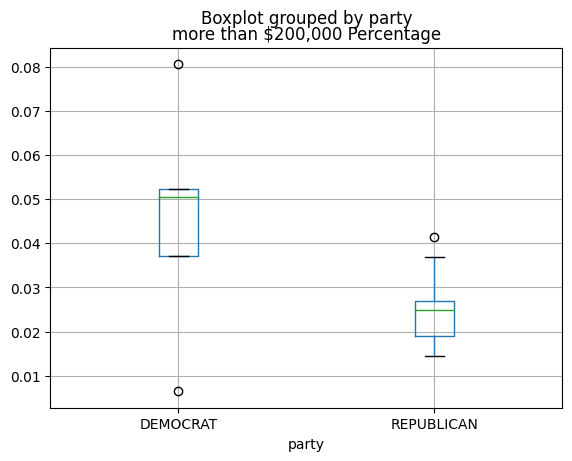

In [17]:
# EDA - Economic status
azalldata2012['less than $39,999 Percentage'].hist(figure=plt.figure())
plt.title('Election 2012')
plt.xlabel('less than $39,999 Percentage')
plt.ylabel('Frequency')
azalldata2016['less than $39,999 Percentage'].hist(figure=plt.figure())
plt.title('Election 2016')
plt.xlabel('less than $39,999 Percentage')
plt.ylabel('Frequency')
azalldata2020['less than $39,999 Percentage'].hist(figure=plt.figure()) # Histogram distribution of incomes under $40k
plt.title('Election 2020')
plt.xlabel('less than $39,999 Percentage')
plt.ylabel('Frequency')
azalldata2012.boxplot(column = 'less than $39,999 Percentage',by = 'party')
azalldata2016.boxplot(column = 'less than $39,999 Percentage',by = 'party')
azalldata2020.boxplot(column = 'less than $39,999 Percentage',by = 'party') # Boxplot of proportion earning under $40k by voted party


azalldata2012['more than $200,000 Percentage'].hist(figure=plt.figure())
plt.title('Election 2012')
plt.xlabel('more than $200,000 Percentage')
plt.ylabel('Frequency')
azalldata2016['more than $200,000 Percentage'].hist(figure=plt.figure())
plt.title('Election 2016')
plt.xlabel('more than $200,000 Percentage')
plt.ylabel('Frequency')
azalldata2020['more than $200,000 Percentage'].hist(figure=plt.figure()) # Histogram distribution of incomes over $200k
plt.title('Election 2020')
plt.xlabel('more than $200,000 Percentage')
plt.ylabel('Frequency')

azalldata2012.boxplot(column = 'more than $200,000 Percentage',by = 'party')
azalldata2016.boxplot(column = 'more than $200,000 Percentage',by = 'party')
azalldata2020.boxplot(column = 'more than $200,000 Percentage',by = 'party') # Boxplot of proportion earning over $200k by voted party

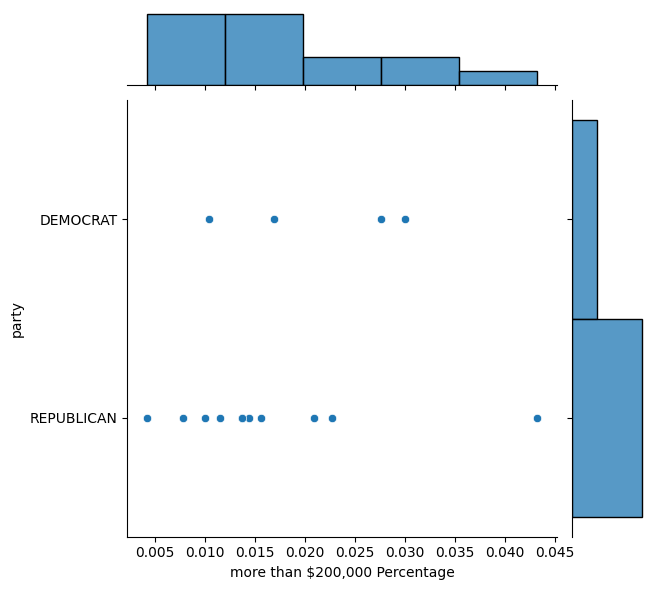

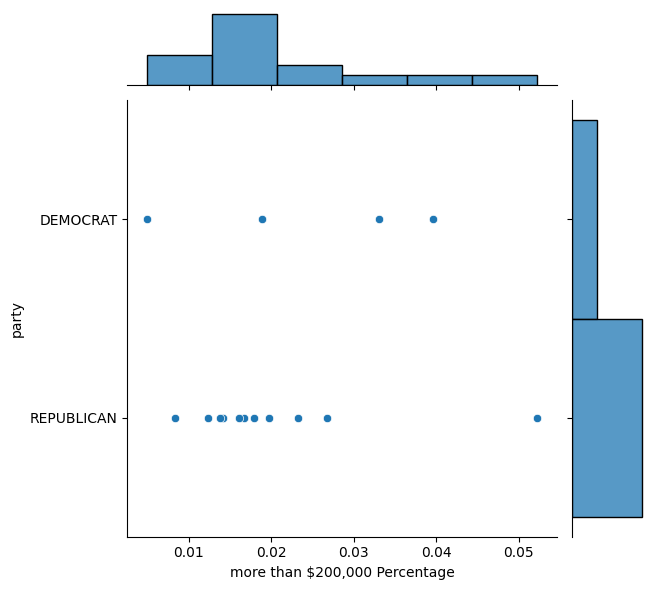

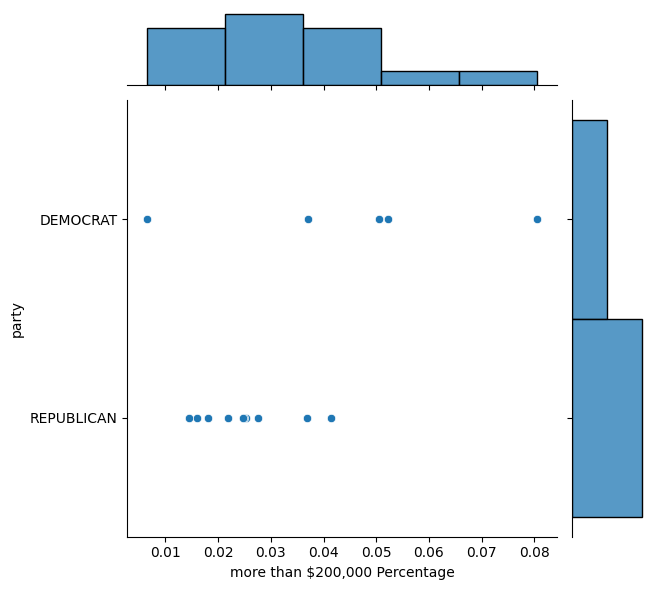

In [19]:
sns.jointplot(x=azalldata2012['more than $200,000 Percentage'],y=azalldata2012['party'])
sns.jointplot(x=azalldata2016['more than $200,000 Percentage'],y=azalldata2016['party'])
sns.jointplot(x=azalldata2020['more than $200,000 Percentage'],y=azalldata2020['party'])

In [ ]:
# EDA - Education
azalldata2012['Regular high school diploma Percentage'].hist(figure=plt.figure())
plt.title('Election 2012')
plt.xlabel('Regular high school diploma Percentage')
plt.ylabel('Frequency')
azalldata2016['Regular high school diploma Percentage'].hist(figure=plt.figure())
plt.title('Election 2016')
plt.xlabel('Regular high school diploma Percentage')
plt.ylabel('Frequency')
azalldata2020['Regular high school diploma Percentage'].hist(figure=plt.figure()) # Histogram distribution of those with a high school diploma
plt.title('Election 2020')
plt.xlabel('Regular high school diploma Percentage')
plt.ylabel('Frequency')

azalldata2012.boxplot(column = 'Regular high school diploma Percentage',by = 'party')
azalldata2016.boxplot(column = 'Regular high school diploma Percentage',by = 'party')
azalldata2020.boxplot(column = 'Regular high school diploma Percentage',by = 'party') # Boxplot of high school graduates by voted party


azalldata2012['Doctorate degree Percentage'].hist(figure=plt.figure())
plt.title('Election 2012')
plt.xlabel('Doctorate degree Percentage')
plt.ylabel('Frequency')
azalldata2016['Doctorate degree Percentage'].hist(figure=plt.figure())
plt.title('Election 2016')
plt.xlabel('Doctorate degree Percentage')
plt.ylabel('Frequency')
azalldata2020['Doctorate degree Percentage'].hist(figure=plt.figure()) # Histogram distribution of those with a high school diploma
plt.title('Election 2020')
plt.xlabel('Doctorate degree Percentage')
plt.ylabel('Frequency')

azalldata2012.boxplot(column = 'Doctorate degree Percentage',by = 'party')
azalldata2016.boxplot(column = 'Doctorate degree Percentage',by = 'party')
azalldata2020.boxplot(column = 'Doctorate degree Percentage',by = 'party') # Boxplot of proportion of doctors by voted party

In [ ]:
# EDA - Education
azalldata2012['Regular high school diploma Percentage'].hist(figure=plt.figure())
plt.title('Election 2012')
plt.xlabel('Regular high school diploma Percentage')
plt.ylabel('Frequency')
azalldata2016['Regular high school diploma Percentage'].hist(figure=plt.figure())
plt.title('Election 2016')
plt.xlabel('Regular high school diploma Percentage')
plt.ylabel('Frequency')
azalldata2020['Regular high school diploma Percentage'].hist(figure=plt.figure()) # Histogram distribution of those with a high school diploma
plt.title('Election 2020')
plt.xlabel('Regular high school diploma Percentage')
plt.ylabel('Frequency')

azalldata2012.boxplot(column = 'Regular high school diploma Percentage',by = 'party')
azalldata2016.boxplot(column = 'Regular high school diploma Percentage',by = 'party')
azalldata2020.boxplot(column = 'Regular high school diploma Percentage',by = 'party') # Boxplot of high school graduates by voted party


azalldata2012['Doctorate degree Percentage'].hist(figure=plt.figure())
plt.title('Election 2012')
plt.xlabel('Doctorate degree Percentage')
plt.ylabel('Frequency')
azalldata2016['Doctorate degree Percentage'].hist(figure=plt.figure())
plt.title('Election 2016')
plt.xlabel('Doctorate degree Percentage')
plt.ylabel('Frequency')
azalldata2020['Doctorate degree Percentage'].hist(figure=plt.figure()) # Histogram distribution of those with a high school diploma
plt.title('Election 2020')
plt.xlabel('Doctorate degree Percentage')
plt.ylabel('Frequency')

azalldata2012.boxplot(column = 'Doctorate degree Percentage',by = 'party')
azalldata2016.boxplot(column = 'Doctorate degree Percentage',by = 'party')
azalldata2020.boxplot(column = 'Doctorate degree Percentage',by = 'party') # Boxplot of proportion of doctors by voted party

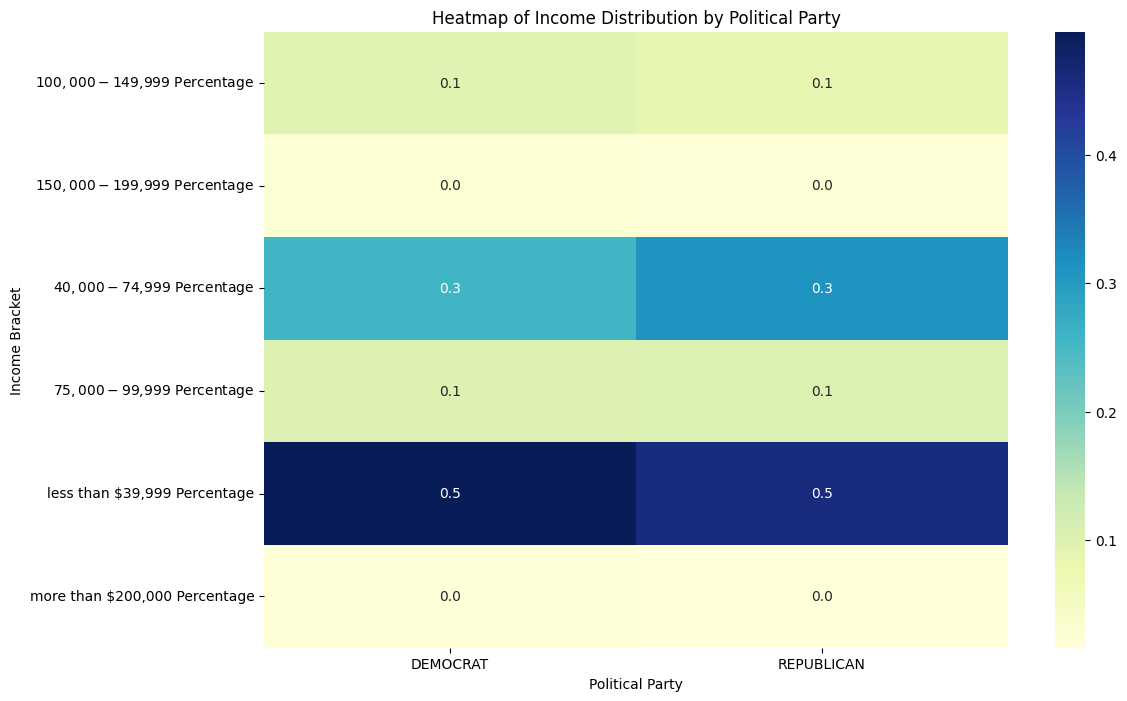

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Melt the income data for plotting
income_columns = [
    'less than $39,999 Percentage',
    '$40,000-$74,999 Percentage',
    '$75,000-$99,999 Percentage',
    '$100,000-$149,999 Percentage',
    '$150,000-$199,999 Percentage',
    'more than $200,000 Percentage'
]

income_data = azalldata2012.melt(id_vars='party', value_vars=income_columns,
                         var_name='Income Bracket', value_name='Percentage')

income_data.head()
heatmap_data = income_data.pivot_table(index='Income Bracket',
                                        columns='party',
                                        values='Percentage',
                                        fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Heatmap of Income Distribution by Political Party')
plt.xlabel('Political Party')
plt.ylabel('Income Bracket')
plt.show()


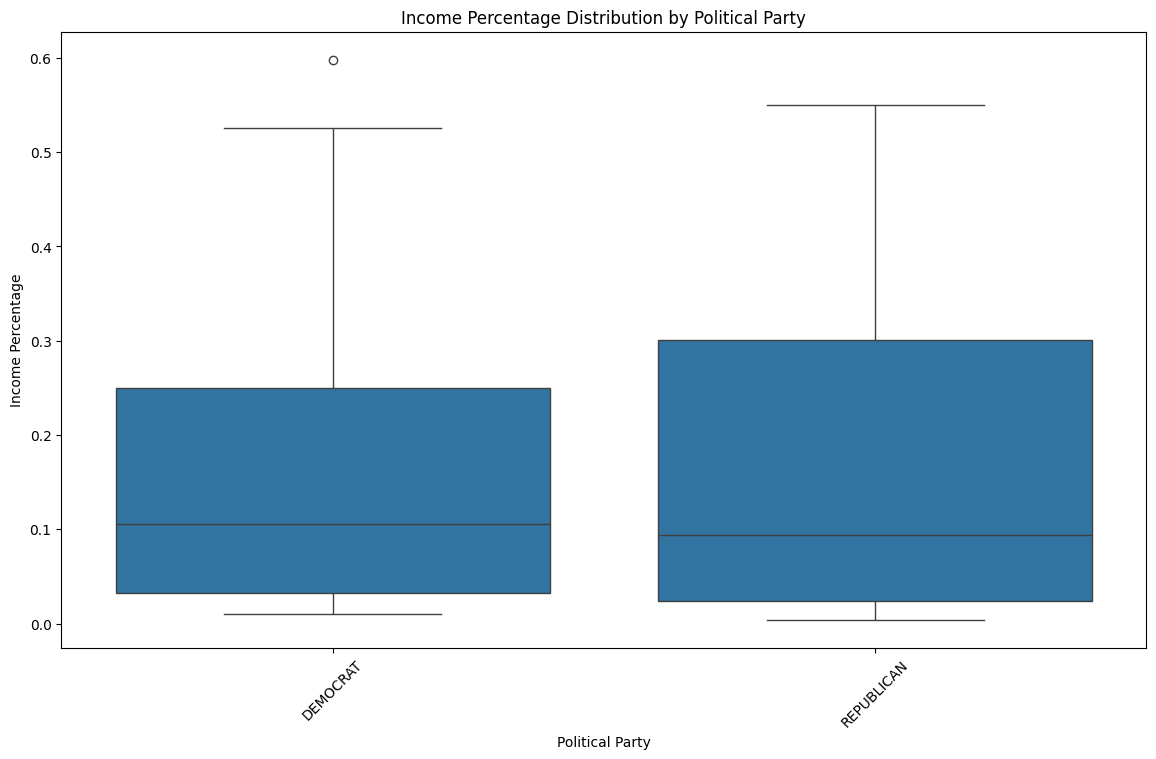

In [28]:
income_summary = azalldata2012[income_columns].copy()
income_summary['party'] = azalldata2012['party']

# Melt for boxplot
income_summary_melted = income_summary.melt(id_vars='party',
                                             value_vars=income_columns,
                                             var_name='Income Bracket',
                                             value_name='Percentage')

# Box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='party', y='Percentage', data=income_summary_melted)
plt.title('Income Percentage Distribution by Political Party')
plt.xlabel('Political Party')
plt.ylabel('Income Percentage')
plt.xticks(rotation=45)
plt.show()

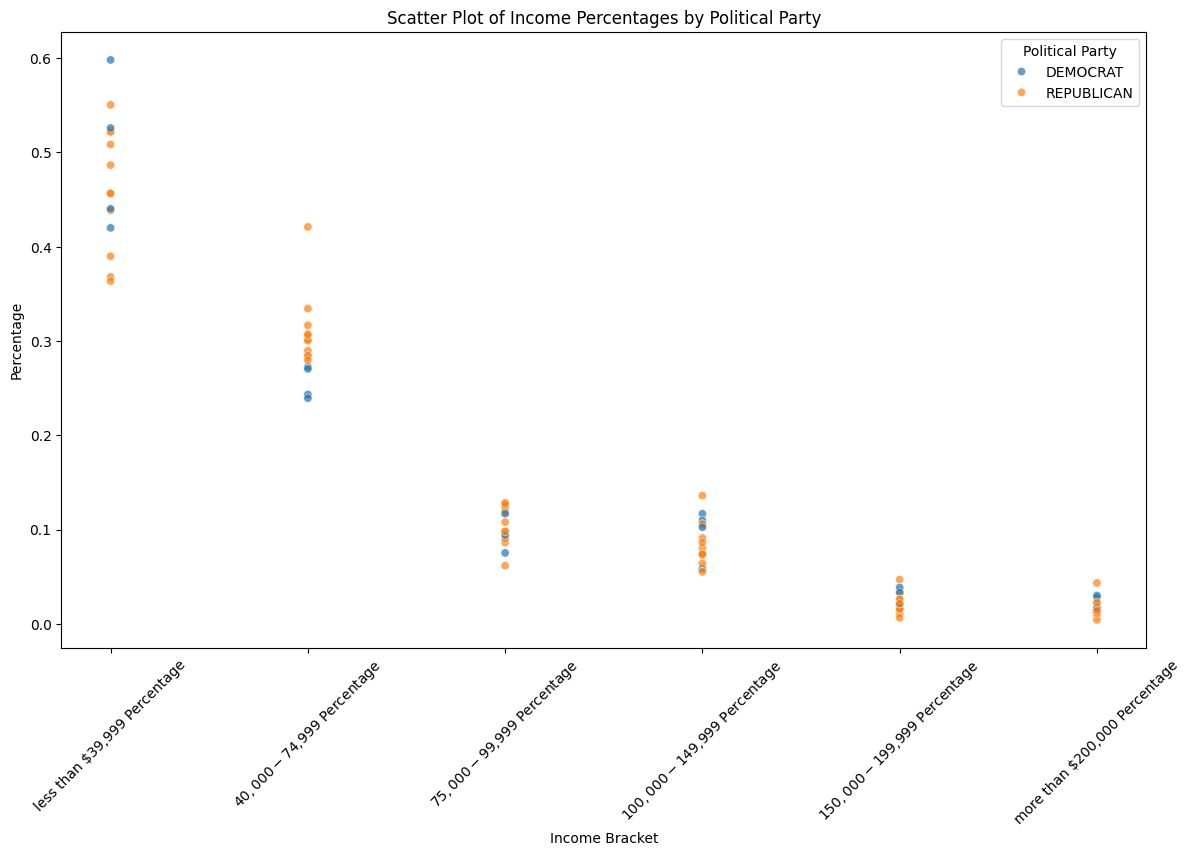

In [29]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=income_summary_melted, x='Income Bracket', y='Percentage', hue='party', alpha=0.7)
plt.title('Scatter Plot of Income Percentages by Political Party')
plt.xlabel('Income Bracket')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Political Party')
plt.show()

<ipython-input-31-470b4c2cb7fd>:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Income Bracket', y='Percentage', hue='party', data=average_income, ci=None)


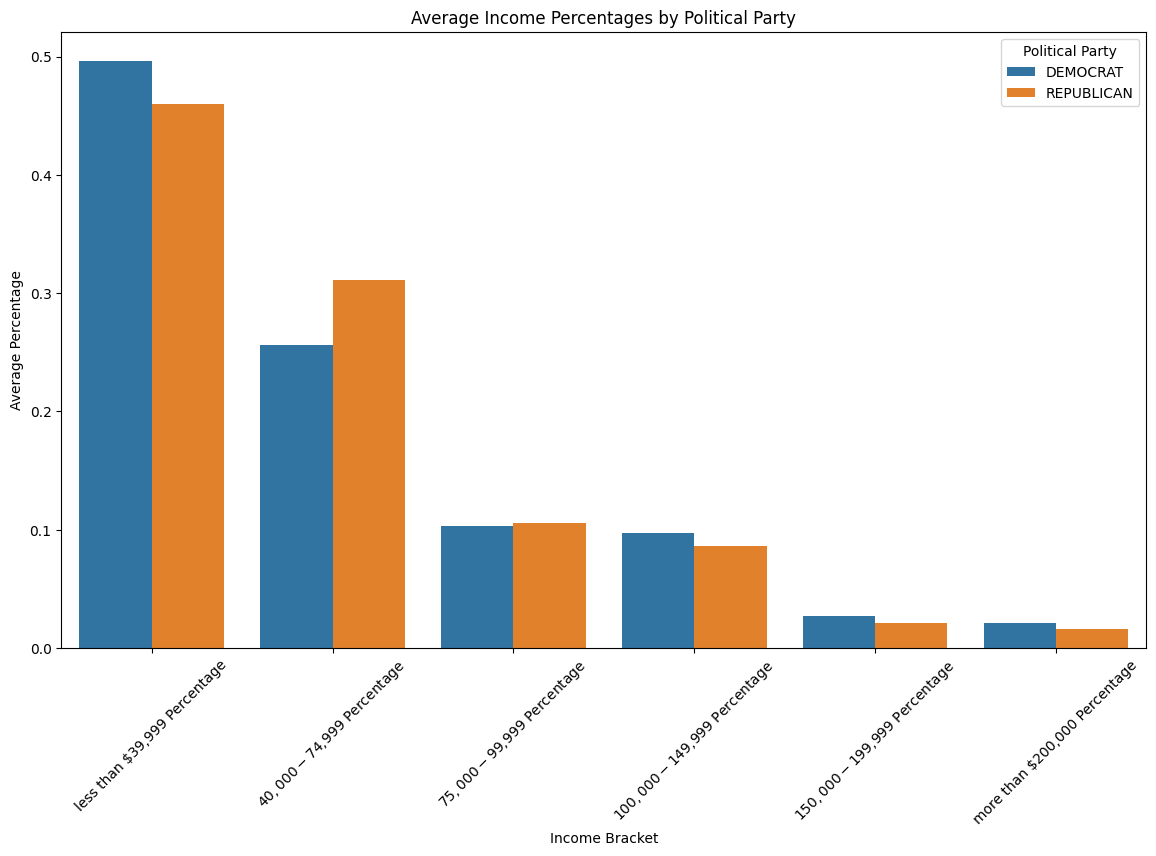

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = azalldata2012

# Melt the income data for plotting
income_columns = [
    'less than $39,999 Percentage',
    '$40,000-$74,999 Percentage',
    '$75,000-$99,999 Percentage',
    '$100,000-$149,999 Percentage',
    '$150,000-$199,999 Percentage',
    'more than $200,000 Percentage'
]

income_data = data.melt(id_vars='party', value_vars=income_columns,
                         var_name='Income Bracket', value_name='Percentage')

# Define the custom order for the income brackets
income_order = [
    'less than $39,999 Percentage',
    '$40,000-$74,999 Percentage',
    '$75,000-$99,999 Percentage',
    '$100,000-$149,999 Percentage',
    '$150,000-$199,999 Percentage',
    'more than $200,000 Percentage'
]

# Calculate the average percentages for each income bracket and party
average_income = income_data.groupby(['party', 'Income Bracket'])['Percentage'].mean().reset_index()

# Ensure the income brackets are ordered correctly
average_income['Income Bracket'] = pd.Categorical(average_income['Income Bracket'], categories=income_order, ordered=True)

# Bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Income Bracket', y='Percentage', hue='party', data=average_income, ci=None)
plt.title('Average Income Percentages by Political Party')
plt.xlabel('Income Bracket')
plt.ylabel('Average Percentage')
plt.xticks(rotation=45)
plt.legend(title='Political Party')
plt.show()

<ipython-input-32-0348fcbfd469>:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Race', y='Percentage', hue='party', data=average_race, ci=None)


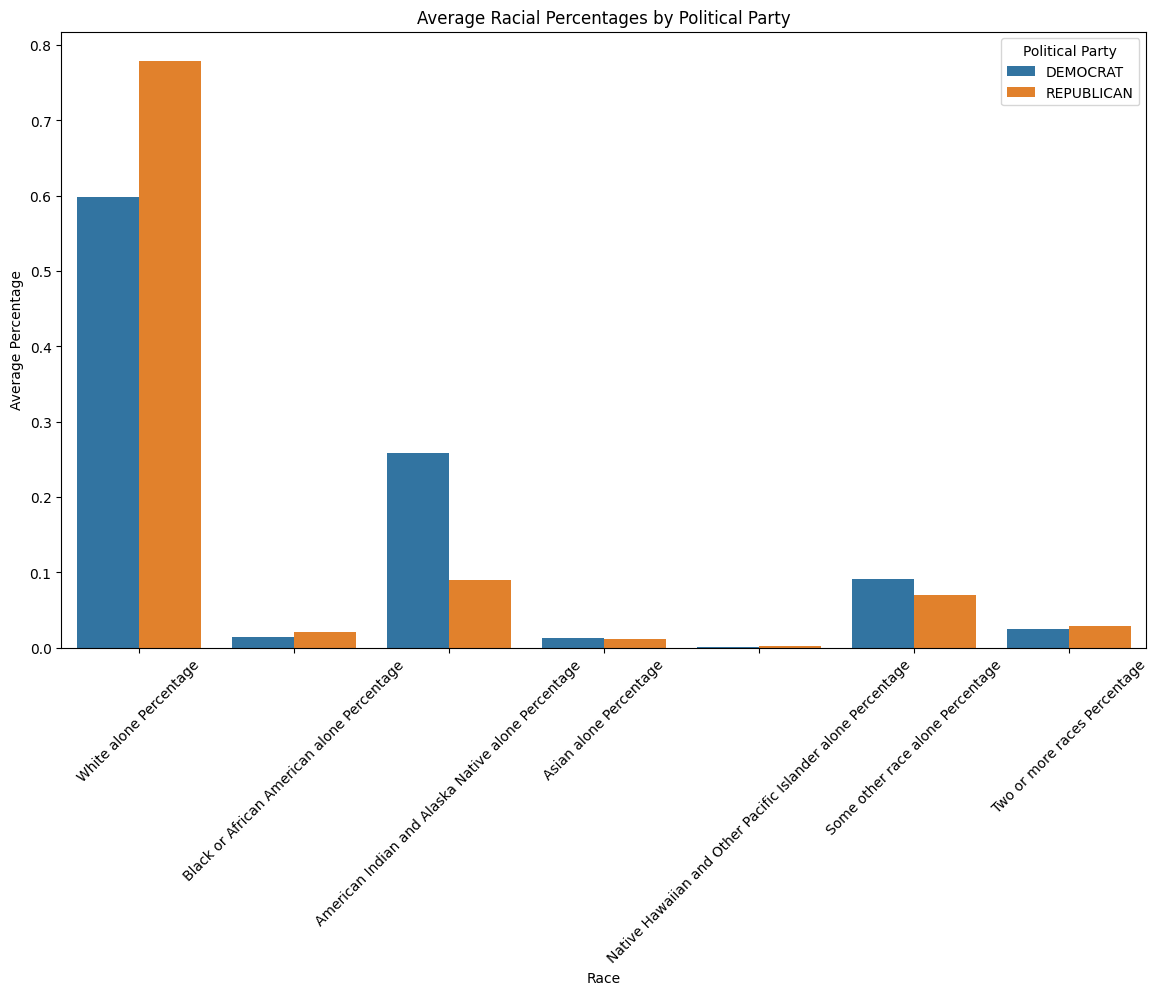

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = azalldata2012

# Melt the racial data for plotting
racial_columns = [
    'White alone Percentage',
    'Black or African American alone Percentage',
    'American Indian and Alaska Native alone Percentage',
    'Asian alone Percentage',
    'Native Hawaiian and Other Pacific Islander alone Percentage',
    'Some other race alone Percentage',
    'Two or more races Percentage'
]

racial_data = data.melt(id_vars='party', value_vars=racial_columns,
                         var_name='Race', value_name='Percentage')

# Define the custom order for the races (if desired)
race_order = [
    'White alone Percentage',
    'Black or African American alone Percentage',
    'American Indian and Alaska Native alone Percentage',
    'Asian alone Percentage',
    'Native Hawaiian and Other Pacific Islander alone Percentage',
    'Some other race alone Percentage',
    'Two or more races Percentage'
]

# Calculate the average percentages for each race and party
average_race = racial_data.groupby(['party', 'Race'])['Percentage'].mean().reset_index()

# Ensure the races are ordered correctly
average_race['Race'] = pd.Categorical(average_race['Race'], categories=race_order, ordered=True)

# Bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Race', y='Percentage', hue='party', data=average_race, ci=None)
plt.title('Average Racial Percentages by Political Party')
plt.xlabel('Race')
plt.ylabel('Average Percentage')
plt.xticks(rotation=45)
plt.legend(title='Political Party')
plt.show()


<ipython-input-34-2df9640fef41>:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Education Level', y='Percentage', hue='party', data=average_education, ci=None)


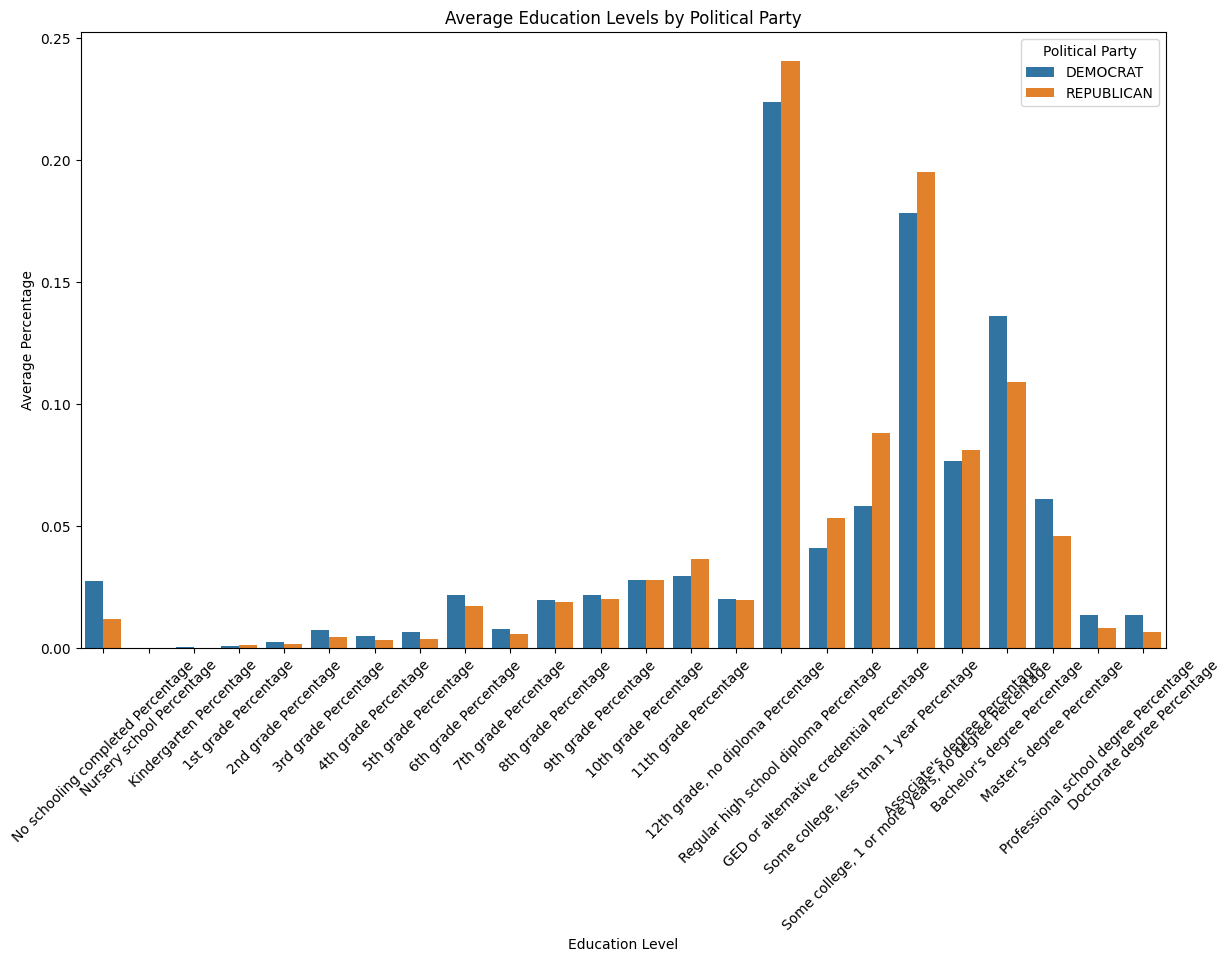

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = azalldata2012

# Melt the education data for plotting
education_columns = [
    'No schooling completed Percentage',
    'Nursery school Percentage',
    'Kindergarten Percentage',
    '1st grade Percentage',
    '2nd grade Percentage',
    '3rd grade Percentage',
    '4th grade Percentage',
    '5th grade Percentage',
    '6th grade Percentage',
    '7th grade Percentage',
    '8th grade Percentage',
    '9th grade Percentage',
    '10th grade Percentage',
    '11th grade Percentage',
    '12th grade, no diploma Percentage',
    'Regular high school diploma Percentage',
    'GED or alternative credential Percentage',
    'Some college, less than 1 year Percentage',
    'Some college, 1 or more years, no degree Percentage',
    "Associate's degree Percentage",
    "Bachelor's degree Percentage",
    "Master's degree Percentage",
    "Professional school degree Percentage",
    "Doctorate degree Percentage"
]

education_data = data.melt(id_vars='party', value_vars=education_columns,
                            var_name='Education Level', value_name='Percentage')

# Define the custom order for education levels (optional)
education_order = [
    'No schooling completed Percentage',
    'Nursery school Percentage',
    'Kindergarten Percentage',
    '1st grade Percentage',
    '2nd grade Percentage',
    '3rd grade Percentage',
    '4th grade Percentage',
    '5th grade Percentage',
    '6th grade Percentage',
    '7th grade Percentage',
    '8th grade Percentage',
    '9th grade Percentage',
    '10th grade Percentage',
    '11th grade Percentage',
    '12th grade, no diploma Percentage',
    'Regular high school diploma Percentage',
    'GED or alternative credential Percentage',
    'Some college, less than 1 year Percentage',
    'Some college, 1 or more years, no degree Percentage',
    "Associate's degree Percentage",
    "Bachelor's degree Percentage",
    "Master's degree Percentage",
    "Professional school degree Percentage",
    "Doctorate degree Percentage"
]

# Calculate the average percentages for each education level and party
average_education = education_data.groupby(['party', 'Education Level'])['Percentage'].mean().reset_index()

# Ensure the education levels are ordered correctly
average_education['Education Level'] = pd.Categorical(average_education['Education Level'], categories=education_order, ordered=True)

# Bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Education Level', y='Percentage', hue='party', data=average_education, ci=None)
plt.title('Average Education Levels by Political Party')
plt.xlabel('Education Level')
plt.ylabel('Average Percentage')
plt.xticks(rotation=45)
plt.legend(title='Political Party')
plt.show()
